![alt text](images/slides/intro.png)

## Table of Contents
- Intro to PyTorch
    - Hello World
    - Auto Grad
    - Linear Regression
    - Gradient Descent
    - Logistic Regression
    - Data loaders for SGD
    - Two layer neural network
- CNNs
- Image Classification





## Intro to PyTorch

Apart from the general Python imports for math, random, Pandas, and and Numpy, we will import the Torch utilities. These include the torch, torch.nn, and torch.utils for the Dataset loaders.

In [2]:
# import pytorch libraries
%matplotlib inline
import torch 
import torch.autograd as autograd 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd;
import numpy as np;
import random;
import math;

**PyTorch consists of 4 main packages:**

- torch: a general purpose array library similar to Numpy that can do computations on GPU
- torch.autograd: a package for automatically obtaining gradients
- torch.nn: a neural net library with common layers and cost functions
- torch.optim: an optimization package with common optimization algorithms like SGD, Adam, etc

### Hello World in PyTorch

Instead of a traditional "Hello World" print statement, we can check PyTorch is functioning properly by creating and outputing a Tensor.

In [3]:
# Create random tensor
N = 5
x = torch.randn(N, 10).type(torch.FloatTensor)

PyTorch tensors are like Numpy tensors but they can utilize GPUs to accelerate numerical computations.

In [4]:
# reshaping of tensors using .view()
x.view(1,-1) #-1 makes torch infer the second dim

tensor([[ 1.3030, -0.0748,  0.4915, -0.6678,  0.5782,  1.4881,  0.8771, -1.7209,
         -0.7206,  0.4409,  1.5073,  0.9110, -0.9527, -0.2817,  0.7495, -0.6145,
          0.1710,  0.1079, -1.8551, -1.9162,  1.4655,  0.5001, -0.7878, -0.0003,
          0.4727,  1.2159, -0.4648,  1.6314,  1.1465, -0.5747,  1.4217,  1.6874,
          1.2847, -1.3143, -1.0050,  0.3831,  0.9101,  0.6209, -0.2820, -0.8355,
          0.0775,  0.4980,  1.2155,  0.6661, -0.9435, -0.2264,  0.2253, -0.5042,
          0.5226, -0.6723]])

## Pytorch Autograd

The autograd package in PyTorch automates the computation of backward passes in neural networks. That is, the gradient of the error with respect to all parameters.

In order for this to happen we need to wrapp up our data and paramerers with the aurograd.Variable() function. Each variable has a .grad property which is it’s gradient with respect to our Error function. Each variable also has a .data property which is it the actual value of the tensor.

In [5]:
x = torch.tensor([1., 2., 3., 4., 5., 6.], requires_grad=True)

In [6]:
x.grad

In [7]:
l = (2*x+1).sum()
l

tensor(48., grad_fn=<SumBackward0>)

In [11]:
l.backward()

In [8]:
x.grad

## Linear Regression with Pytorch

The goal of linear regression is to fit a line to a set of points.

In [9]:
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)

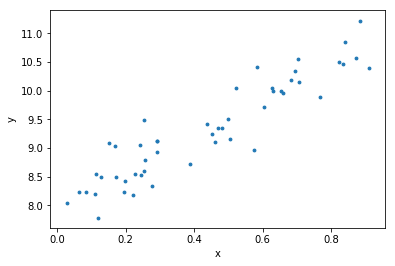

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x,y, s=8); plt.xlabel("x"); plt.ylabel("y");

You want to find parameters (weights) $a$ and $b$ such that you minimize the error between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common error function or loss function is the mean squared error.

In [11]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

Suppose we believe $a = 10$ and $b = 5$ then we can compute y_hat which is our prediction and then compute our error.

In [12]:
y_hat = lin(10,5,x)
mse(y_hat, y)

3.208888229511307

In [13]:
def mse_loss(a, b, x, y): return mse(lin(a,b,x), y)

In [14]:
mse_loss(10, 5, x, y)

3.208888229511307

So far we have specified the model (linear regression) and the evaluation criteria (or loss function). Now we need to handle optimization; that is, how do we find the best values for $a$ and $b$? How do we find the best fitting linear regression.

## Gradient Descent with Pytorch

For a fixed dataset $x$ and $y$ mse_loss(a,b) is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in PyTorch.

In [15]:
# generate some more data
x, y = gen_fake_data(10000, 3., 8.)
x.shape, y.shape

((10000,), (10000,))

In [16]:
# Wrap x and y as tensor 
x = torch.tensor(x)
y = torch.tensor(y)

In [17]:
# Create random Tensors for weights, and wrap them in Variables.
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Variables during the backward pass.
a, b = np.random.randn(1), np.random.randn(1)
a = torch.tensor(a, requires_grad=True)
b = torch.tensor(b, requires_grad=True)
a,b

(tensor([-0.1537], dtype=torch.float64, requires_grad=True),
 tensor([-0.0606], dtype=torch.float64, requires_grad=True))

In [18]:
learning_rate = 1e-3
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.item())
    
    # Computes the gradient of loss with respect to all Variables with requires_grad=True.
    # After this call a.grad and b.grad will be Variables holding the gradient
    # of the loss with respect to a and b respectively
    loss.backward()
    
    # Update a and b using gradient descent; a.data and b.data are Tensors,
    # a.grad and b.grad are Variables and a.grad.data and b.grad.data are Tensors
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    # Zero the gradients
    a.grad.data.zero_()
    b.grad.data.zero_()

93.94624461714483
0.723633938873314
0.13565739929790246
0.12229225468962522
0.11472799267187864
0.10893214909537073
0.10447860105414015
0.10105639941099707
0.09842670593137029
0.09640599279750613


In [19]:
print(a,b)

tensor([3.2438], dtype=torch.float64, requires_grad=True) tensor([7.8683], dtype=torch.float64, requires_grad=True)


## Logistic Regression

In [20]:
# generating fake data
# Here we generate some fake data
def lin(a,b,x): return a*x+b

def gen_logistic_fake_data(n, a, b):
    x = np.random.uniform(-20,20, (n, 2))
    x2_hat = lin(a,b, x[:,0])
    y = x[:,1] > x2_hat
    return x, y.astype(int)

x, y = gen_logistic_fake_data(100, 1., 0.5)

In [21]:
y

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0])

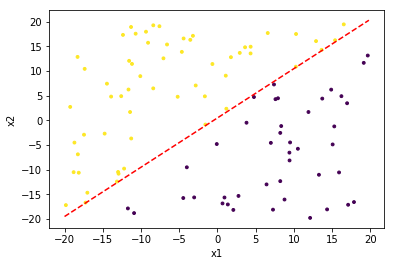

In [22]:
t = np.arange(-20, 20, 0.2)
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y, s=8);
plt.xlabel("x1"); plt.ylabel("x2");
plt.plot(t, t + 0.5, 'r--')

In [24]:
#Define tensors for x,y variables
x = torch.tensor(x).float()
y = torch.tensor(y).float()

In [27]:
#Define model as linear within a sequential container - Modules will be added to it in the order they are passed in the constructor. Alternatively, an ordered dict of modules can also be passed in.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)

In [28]:
model(x).shape

torch.Size([100, 1])

In [29]:
x, y = gen_logistic_fake_data(10000, 1., 0.5)
x = torch.tensor(x).float()
y = torch.tensor(y).float()

In [30]:
learning_rate = 0.1
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [32]:
for t in range(10000):
    # Forward pass: compute predicted y using operations on Variables
    y_hat = model(x)
    loss = F.binary_cross_entropy(torch.sigmoid(y_hat), y.unsqueeze(1))
    if t % 1000 == 0: print(loss.item())
       
    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables
    optimizer.zero_grad()
    loss.backward()
    
    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

0.001965112518519163
0.001587492530234158
0.0012827527243644
0.0010670149931684136
0.0009123444324359298
0.0007976568886078894
0.0007099861395545304
0.0006399397971108556
0.000583216839004308
0.0005360309733077884


In [33]:
print([p/136 for p in model.parameters()])

[tensor([[-0.3950,  0.3947]], grad_fn=<DivBackward0>), tensor([-0.1938], grad_fn=<DivBackward0>)]


## Stochastic Gradient Descent

Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seen as an approximation of gradient descent (GD). In GD you have to run through all the samples in your training set to do a single iteration. In SGD you use only one or a subset of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a batch or minibatch.

In [34]:
#Define Model
model2 = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
)

In [38]:
#import data loaders
from torch.utils.data import Dataset, DataLoader

In [39]:
def lin(a,b,x): return a*x+b

def gen_fake_data(n, a, b):
    x = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x.astype(np.float32), y.astype(np.float32)

# create a dataset
class RegressionDataset(Dataset):
    def __init__(self, a=3, b=8, n=10000):
        x, y = gen_fake_data(n, a, b)
        x = torch.from_numpy(x).unsqueeze(1)
        y = torch.from_numpy(y)
        self.x, self.y = x, y
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
fake_dataset = RegressionDataset()

**Next we are going to create a data loader. The data loader provides the following features:**

- Batching the data
- Shuffling the data
- Load the data in parallel using multiprocessing workers.

In [40]:
dataloader = DataLoader(fake_dataset, batch_size=1000, shuffle=True)
x, y = next(iter(dataloader))

In [41]:
y.type(torch.FloatTensor)

tensor([10.3556,  9.6981, 11.2707,  8.8119,  8.0249,  8.8778, 10.2504,  9.1702,
        10.8051, 11.1110, 10.6711,  7.4101, 10.6405, 10.2363,  8.4747,  8.5383,
        10.5444,  8.6240,  9.0313, 10.5511,  8.1280, 10.7083,  7.7880,  9.3362,
        10.8097,  9.4605,  8.6405,  9.1849,  8.6302,  8.9207,  9.6847,  9.0947,
        10.5747, 10.3884,  8.1781,  8.5687, 10.7305,  9.7167,  8.3943, 10.2530,
         9.3803, 10.6402,  8.4230,  8.3189, 10.7330,  8.4579,  9.3992,  9.4296,
         8.0418,  9.6547,  9.7755,  8.2350,  9.5600, 10.2348, 10.8164,  9.9888,
        10.6274, 10.9193,  9.7805,  8.3389,  8.2149,  9.3484,  8.8466,  9.9479,
         9.6687, 11.1007, 10.2653,  7.6146,  8.5155,  8.0267,  9.3403,  9.4977,
        10.8959,  8.4054,  9.5117, 11.1301, 10.4418, 10.5325, 10.8535, 10.4651,
         9.3695, 10.0792,  9.9086, 10.4470,  9.0601,  8.5100, 10.4773,  9.3182,
         7.9056, 10.1071, 10.5462, 10.2786, 10.8938,  9.9491,  9.3667, 10.1468,
         9.2289, 10.9534, 10.7078,  8.06

In [43]:
learning_rate = 0.1
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

In [49]:
from torch.autograd import Variable

for t in range(1000):
    for i, (x, y) in enumerate(dataloader): 
        x = Variable(x, requires_grad=False)
        y = Variable(y, requires_grad=False)
        y = y.type(torch.FloatTensor)
        
        y_hat = model2(x)
        loss = F.mse_loss(y_hat, y.unsqueeze(1))
    
        optimizer.zero_grad()
        loss.backward()
    
        optimizer.step()
    if t % 100 == 0: print(loss.item())

0.09346969425678253
0.0923093855381012
0.09443642199039459
0.08615659177303314
0.09743224829435349
0.08724921941757202
0.09439476579427719
0.09284058958292007
0.08795599639415741
0.08613664656877518


0.4.1



## References

- http://pytorch.org/tutorials/beginner/pytorch_with_examples.html
- https://hsaghir.github.io/data_science/pytorch_starter/
- http://a.sjtume.cn/2017/PyTorch-CNN/
